<a href="https://colab.research.google.com/github/suryautharakumar/DAS7000_Data_Analytics_and_Visualisation/blob/main/Stu_MarketPulse_Electronics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: MarketPulse Electronics – Sales Trends and Insights

Dataset Used: Electronics Store Sales Dataset – contains 12 monthly sales files with order dates, product categories, prices, and locations.

MarketPulse Electronics is a mid-sized electronics retail chain operating across major U.S. cities - including New York, San Francisco, Boston, and Los Angeles.
Over the past year (January-December), the company has noticed fluctuating profits and seasonal changes in sales patterns.

Their management wants to understand when, what, and where they sell best - and why some months or products perform poorly.

They’ve collected data from their POS (Point of Sale) system. Each transaction includes:

Order ID

Product

Quantity Ordered

Price Each

Order Date

Purchase Address

Your task is to act as a Data Analyst Consultant hired to explore this dataset and generate meaningful insights through visual data storytelling.

# Business Questions

#Sales Performance Over Time

When are sales highest and lowest throughout the year?

Plot monthly sales trends using a line plot.

Hint: Use groupby('Month')['Sales'].sum() and visualize.

#Top-Selling Products

Which products generate the most revenue?

Use a bar chart to visualize total sales by product.

Hint: Compare revenue and quantity ordered — do expensive products sell less frequently?

#Sales by City

Which cities contribute most to total revenue?

Create a horizontal bar chart or map-based visualization.

Hint: Extract the city from the purchase address using string manipulation.

#Product Relationships

Do some products sell together for example-  iPhone + Lightning Cable?

Create a scatter plot or heatmap showing co-purchase frequency.

Hint: Look for identical Order IDs containing multiple products.

#Price vs Quantity Relationship

Do cheaper products sell in higher quantities?

Use a scatter plot to explore correlation between price and units sold.

#Revenue Distribution

Use a histogram or boxplot to visualize how individual transaction revenues vary.

Hint: Identify outliers for example- bulk orders or large purchases.


#Hints for Students

Combine all monthly CSVs into one DataFrame (12 files).

Convert Order Date to a proper datetime format.

Create derived columns (Month, City, Sales).

Use Matplotlib and Seaborn for plots.

Try plt.subplots() for multiple plots on one figure.

Use color palettes (e.g., coolwarm, viridis) for better presentation.

Summarize findings in a short presentation or report with visuals.

Expected Visualizations (Students Can Use)

Line Plot:	Monthly sales trends

Bar Chart:	Product or city-wise sales

Scatter Plot:	Relationship between price and quantity

Box Plot:	Distribution of sales per order

Histogram:	Revenue or quantity distribution

Heatmap:	Co-purchase or correlation matrix

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Colab/sales_report"

/content/drive/My Drive/Colab/sales_report


In [3]:
%ls

Sales_April_2019.csv     Sales_January_2019.csv  Sales_May_2019.csv
Sales_August_2019.csv    Sales_July_2019.csv     Sales_November_2019.csv
Sales_December_2019.csv  Sales_June_2019.csv     Sales_October_2019.csv
Sales_February_2019.csv  Sales_March_2019.csv    Sales_September_2019.csv


In [4]:
import pandas as pd

# merging csv files
df = pd.concat(
    map(pd.read_csv, ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv', 'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']), ignore_index=True)
print(df)

       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')

df.info()

/tmp/ipython-input-106287223.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.6+ MB


In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df['Month'] = df['Order Date'].dt.month

monthly_sales = df.groupby('Month')['Sales'].sum()

In [9]:
!pip install mplcursors

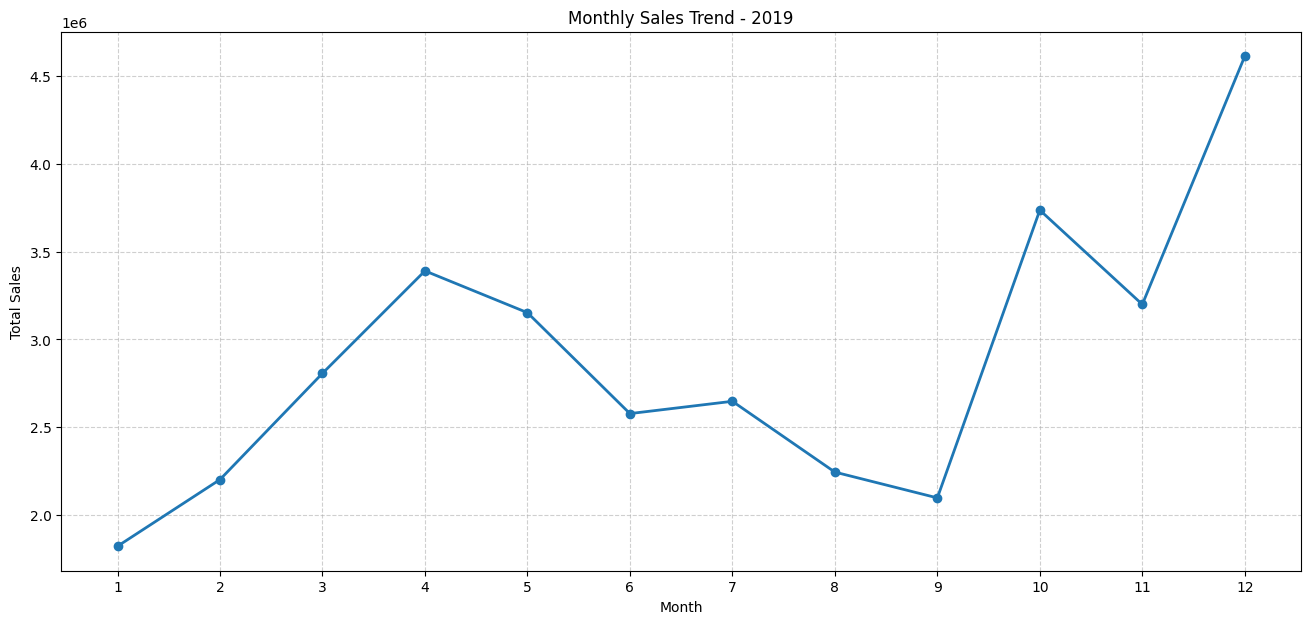

In [10]:
import matplotlib.pyplot as plt
import mplcursors

%matplotlib inline

plt.figure(figsize=(16,7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Sales Trend - 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.grid(True, linestyle='--', alpha=0.6)

cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Month: {sel.target[0]}\nSales: {sel.target[1]}"
))

plt.show()
